In [2]:
%run 'malaria_functions.ipynb'

from __future__ import absolute_import, division, print_function, unicode_literals
import os
import sys
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
random.seed(1)

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
#Loading data with compounds IDs, SMILES and information about their activity
osm_list = reading_csv()
osm_cleaned = data_preproc(osm_list)
osm_cleaned = osm_cleaned.reset_index(drop=True)

Number of instances of each level of ION_ACTIVITY 
 0.0    395
1.0     55
0.5      5
Name: ION_ACTIVITY, dtype: int64


In [4]:
#osm_cleaned = osm_cleaned.drop_duplicates(keep='first', inplace=False)

In [5]:
#pd.options.display.max_rows = 999
#osm_cleaned.loc[:,("SMILES", "ID")].to_csv('smiles_malaria.txt', header=None, index=None, sep=str('\t'))

In [6]:
print ("Number of instances of each level of ION_ACTIVITY", "\n", osm_cleaned['ION_ACTIVITY'].value_counts())

Number of instances of each level of ION_ACTIVITY 
 0.0    395
1.0     55
0.5      5
Name: ION_ACTIVITY, dtype: int64


In [7]:
osm_series4 = series4_cmp(osm_cleaned)
osm_series4

Number of instances of each level of ION_ACTIVITY 
 1.0    23
0.0    17
0.5     4
Name: ION_ACTIVITY, dtype: int64


,ID,SMILES,ION_ACTIVITY,TEST_SET,PvsP,pEC50,ORIGIN
0,OSM-S-175,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,B,0.347500,-0.459045,OSM S4
1,OSM-S-177,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,A,10.000000,1.000000,OSM S4
2,OSM-S-201,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,B,4.595600,0.662342,OSM S4
3,OSM-S-202,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,A,0.211000,-0.675718,OSM S4
4,OSM-S-204,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,B,0.901800,-0.044890,OSM S4
5,OSM-S-218,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,B,0.110500,-0.956638,OSM S4
6,OSM-S-218,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,B,0.110500,-0.956638,OSM S4
7,OSM-S-254,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,0.5,B,0.774400,-0.111035,OSM S4
8,OSM-S-272,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,B,0.107800,-0.967381,OSM S4
9,OSM-S-278,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,0.5,B,4.215400,0.624839,OSM S4


In [8]:
#pd.options.display.max_rows = 999
#osm_series4.loc[:,("SMILES", "ID")].to_csv('smiles_series4.txt', header=None, index=None, sep=str('\t'))

In [9]:
osm_series4 = osm_series4.drop(osm_series4.index[6])

In [10]:
osm_series4

,ID,SMILES,ION_ACTIVITY,TEST_SET,PvsP,pEC50,ORIGIN
0,OSM-S-175,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,B,0.347500,-0.459045,OSM S4
1,OSM-S-177,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,A,10.000000,1.000000,OSM S4
2,OSM-S-201,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,B,4.595600,0.662342,OSM S4
3,OSM-S-202,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,A,0.211000,-0.675718,OSM S4
4,OSM-S-204,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,B,0.901800,-0.044890,OSM S4
5,OSM-S-218,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,B,0.110500,-0.956638,OSM S4
7,OSM-S-254,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,0.5,B,0.774400,-0.111035,OSM S4
8,OSM-S-272,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,B,0.107800,-0.967381,OSM S4
9,OSM-S-278,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,0.5,B,4.215400,0.624839,OSM S4
10,OSM-S-279,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CC=C(OC(F)F...,1.0,B,0.314275,-0.502690,OSM S4


In [11]:
# Storing the result of a inner merge from both dataframes
common = osm_cleaned.merge(osm_series4, on=['SMILES'])
# Selecting the rows when one column's values are not in this common
osm_train = osm_cleaned[(~osm_cleaned.loc[:,'SMILES'].isin(common.loc[:,'SMILES']))]
osm_train = osm_train.reset_index(drop=True)
osm_train

,ID,SMILES,ION_ACTIVITY,TEST_SET,PvsP,pEC50
0,OSM-S-106,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,0.0,A,NaN,NaN
1,OSM-S-111,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,0.0,A,0.165667,-0.780765
2,OSM-S-35,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,A,0.025000,-1.602060
3,OSM-S-4,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,0.0,A,50.000000,1.698970
4,OSM-S-5,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,0.0,A,0.515000,-0.288193
5,OSM-S-51,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,A,0.277000,-0.557520
6,MMV019066,COc1ccccc1CNC(=O)CCN2C(=O)Nc3ccsc3C2=O,0.0,M,0.140000,-0.853872
7,MMV665941,CN(C)c1ccc(cc1)C(O)(c2ccc(cc2)N(C)C)c3ccc(cc3)...,0.0,M,0.255000,-0.593460
8,MMV396680,c1(cc(c2ccc(C)cc2)n3)n3ccnc1SCC(=O)Nc(c(Cl)ccc...,0.0,M,0.092800,-1.032452
9,MMV666601,CCOC(=O)C1=C(N=C2SC(=Cc3cc(C)n(c3C)c4ccc(F)cc4...,0.0,M,0.154000,-0.812479


In [12]:
print ("Number of instances of each level of ION_ACTIVITY", "\n", osm_train['ION_ACTIVITY'].value_counts())

Number of instances of each level of ION_ACTIVITY 
 0.0    378
1.0     33
0.5      1
Name: ION_ACTIVITY, dtype: int64


In [13]:
#Getting fingerprints descriptors
osm_fp = fingerprint_desc(osm_train)
osm_sp = spectrophores(osm_train)

osm_sp4 = spectrophores(osm_series4)
osm_fp4 = fingerprint_desc(osm_series4)


In [14]:
osm_fp.head()

,ION_ACTIVITY,SMILES,ecfp6,fcfp6,hashap,hashtt,rdk7
0,0.0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ..."
1,0.0,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ..."
2,0.0,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ..."
3,0.0,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."
4,0.0,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."


In [15]:
osm_fp4.head()

,ION_ACTIVITY,SMILES,ecfp6,fcfp6,hashap,hashtt,rdk7
0,1.0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,0.0,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
2,0.0,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
3,1.0,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,0.5,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [16]:
osm_sp.head()

,SMILES,ION_ACTIVITY,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,NS(=O)(=O)c1cccc(c1)c2cc3ncnc(N)c3s2,0.0,-0.765092,-1.541354,-1.321522,-0.607732,0.961830,0.551068,0.112699,-0.450344,...,0.779936,0.244877,-0.423148,-1.835613,0.771521,1.079754,0.327475,0.288498,0.655403,NS(=O)(=O)c1cccc(c1)c1cc2ncnc(N)c2s1\t\n
1,O=C(/C(S/1)=C/C2=C(C)N(C3=CC=C(OC)C=C3)C(C)=C2...,0.0,-1.284058,-1.306097,-1.368643,-0.408045,0.793141,-0.149030,0.065173,0.222587,...,0.595345,-0.097300,-0.598912,-1.329041,1.645278,0.676901,-0.261172,0.311570,1.024288,O=C1/C(=C/c2c(C)n(c3ccc(OC)cc3)c(C)c2)/S/C(=N\...
2,CC1=C(/C=C2S/C(NC\2=O)=N\C3=CC=CC=C3)C=C(C)N1C...,0.0,-1.113847,-1.276257,-1.182517,-0.756841,1.016869,0.141989,-0.384524,0.058367,...,0.666246,-0.226131,-0.411710,-1.780866,1.681554,0.633091,-0.058866,0.133666,1.051344,Cc1c(/C=C/2\S/C(=N\c3ccccc3)/NC2=O)cc(C)n1c1cc...
3,CC(N1C2=CC=C(F)C=C2)=C(C(O)=O)C=C1C,0.0,-0.617507,-1.010758,0.601820,0.861423,0.293750,-0.571787,-1.952485,1.264201,...,1.271083,-0.808107,-0.801751,-1.263052,1.322462,0.961717,-0.393893,-0.657222,0.680474,Cc1n(c2ccc(F)cc2)c(cc1C(=O)O)C\t\n
4,FC1=CC=C(N2C(C)=CC(C(OCC(N)=O)=O)=C2C)C=C1,0.0,-1.892775,-1.768835,-0.730846,0.390601,0.808976,0.485623,0.176335,-0.303638,...,0.868230,-0.326132,-0.729798,-1.220864,1.512711,0.547901,-0.327128,-0.001018,1.232996,Fc1ccc(n2c(C)cc(C(=O)OCC(=O)N)c2C)cc1\t\n


In [17]:
osm_sp4.head()

,SMILES,ION_ACTIVITY,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,-1.294483,-1.514732,-0.804285,-0.261531,0.493058,-0.469001,-0.901758,0.608758,...,0.851650,-0.446348,-0.436065,-1.796319,1.361985,0.531236,0.107366,-0.286087,1.007621,O=C(Nc1ccnc(C(F)(F)F)c1)c1cncc2nnc(c3ccc(OC(F)...
1,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,0.0,-0.934602,-1.182143,-1.456757,-0.494502,0.380099,0.900308,-0.358257,-0.350693,...,0.517269,-0.273632,-0.203350,-1.122651,0.602736,0.764260,0.773280,1.020784,1.024879,O=C(N1Cc2ccccc2C1)c1cncc2nnc(c3ccc(OC(F)F)cc3)...
2,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.0,-0.782432,-1.629025,-1.162360,-0.451630,0.371541,0.668743,-0.664661,-0.454917,...,1.113268,-0.708566,-0.676001,-1.586951,1.261107,0.721033,0.140412,-0.326692,1.102614,O=C(Nc1c(C)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...
3,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,-1.133692,-1.744671,-1.028628,-0.722594,0.607502,0.868743,0.065441,-0.093313,...,1.026218,-0.375085,-0.565645,-1.391250,1.597488,1.044611,-0.505079,-0.251909,0.639862,c1ncc2n(c1C(=O)Nc1cccc(c1)Cl)c(nn2)c1ccc(cc1)O...
4,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,0.5,-1.337094,-0.894066,-1.380720,-0.266464,0.465006,0.918113,-0.363101,-0.757368,...,1.004409,-0.570672,-0.432328,-1.647680,1.088082,0.593709,0.331763,0.339226,1.002689,O=C(Nc1c(F)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...


In [18]:
osm_fpi = fp_individual(osm_fp)
osm_fpi = quitar_fps(osm_fpi) 

osm_fpi4 = fp_individual(osm_fp4)
osm_fpi4 = quitar_fps(osm_fpi4)

In [19]:
osm_fpi4.head()

,ION_ACTIVITY,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,...,fcfp6_795,fcfp6_794,fcfp6_410,fcfp6_124,fcfp6_412,fcfp6_413,fcfp6_414,fcfp6_415,fcfp6_416,fcfp6_125
0,1.0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.5,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
fp_sp = merge_dfs(osm_fpi, osm_sp)
fp_sp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 411
Columns: 5171 entries, ION_ACTIVITY to MOLECULES
dtypes: float64(5169), object(2)
memory usage: 16.3+ MB


In [21]:
#fp_sp=osm_fpi
#fp_sp4=osm_fpi4

#fp_sp = fp_sp.drop(['ecfp6', 'fcfp6', 'hashap', 'hashtt', 'rdk7'], axis=1) 
#fp_sp4 = fp_sp4.drop(['ecfp6', 'fcfp6', 'hashap', 'hashtt', 'rdk7'], axis=1) 

In [22]:
fp_sp4 = merge_dfs(osm_fpi4, osm_sp4)
fp_sp4

,ION_ACTIVITY,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,1.0,O=C(NC1=CC=NC(C(F)(F)F)=C1)C2=CN=CC3=NN=C(C4=C...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.851650,-0.446348,-0.436065,-1.796319,1.361985,0.531236,0.107366,-0.286087,1.007621,O=C(Nc1ccnc(C(F)(F)F)c1)c1cncc2nnc(c3ccc(OC(F)...
1,0.0,O=C(N1CC(C=CC=C2)=C2C1)C3=CN=CC4=NN=C(C5=CC=C(...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.517269,-0.273632,-0.203350,-1.122651,0.602736,0.764260,0.773280,1.020784,1.024879,O=C(N1Cc2ccccc2C1)c1cncc2nnc(c3ccc(OC(F)F)cc3)...
2,0.0,O=C(NC1=C(C)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.113268,-0.708566,-0.676001,-1.586951,1.261107,0.721033,0.140412,-0.326692,1.102614,O=C(Nc1c(C)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...
3,1.0,c1ncc2n(c1C(Nc1cccc(c1)Cl)=O)c(nn2)c1ccc(cc1)O...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.026218,-0.375085,-0.565645,-1.391250,1.597488,1.044611,-0.505079,-0.251909,0.639862,c1ncc2n(c1C(=O)Nc1cccc(c1)Cl)c(nn2)c1ccc(cc1)O...
4,0.5,O=C(NC1=C(F)C(Cl)=CC=C1)C2=CN=CC(N23)=NN=C3C4=...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.004409,-0.570672,-0.432328,-1.647680,1.088082,0.593709,0.331763,0.339226,1.002689,O=C(Nc1c(F)c(Cl)ccc1)c1cncc2n1c(nn2)c1ccc(OC(F...
5,1.0,FC1=C(F)C=CC(C(OC)COC2=CN=CC3=NN=C(C4=CC=C(C#N...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.542878,-0.505960,-0.146543,-1.583837,1.643038,0.655849,0.032191,0.208461,1.160337,Fc1c(F)ccc(C(OC)COc2cncc3nnc(c4ccc(C#N)cc4)n23...
6,0.5,O=C(NC1=CC(Cl)=CC=C1C)C2=CN=CC(N23)=NN=C3C4=CC...,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.582401,-0.535822,-0.000092,-1.599546,1.154135,0.409795,0.372391,0.111701,1.346565,O=C(Nc1cc(Cl)ccc1C)c1cncc2n1c(nn2)c1ccc(OC(F)F...
7,1.0,FC1=C(F)C=CC(CCOC2=CN=CC3=NN=C(C4=CC=C(Cl)C=C4...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.601594,-0.770497,-0.246050,-1.322011,1.826989,0.562704,-0.012351,0.059423,1.165754,Fc1c(F)ccc(CCOc2cncc3nnc(c4ccc(Cl)cc4)n23)c1\t\n
8,0.5,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CN=C(C(F)(F...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.954476,-0.464263,-0.570025,-1.294795,1.249960,0.758272,0.495875,0.417966,0.919619,OC(c1ccccc1)COc1cncc2nnc(c3cnc(C(F)(F)F)cc3)n1...
9,1.0,OC(C1=CC=CC=C1)COC2=CN=CC3=NN=C(C4=CC=C(OC(F)F...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.786491,-0.306393,0.074446,-1.469302,1.198848,0.593613,0.092602,0.098288,1.016792,OC(c1ccccc1)COc1cncc2nnc(c3ccc(OC(F)F)cc3)n12\t\n


In [24]:
npdesc, nplab = df_to_ndarrays(fp_sp)

In [25]:
npdesc4, nplab4 = df_to_ndarrays(fp_sp4)

In [26]:
npdesc = preprocessing.scale(npdesc)
npdesc4 = preprocessing.scale(npdesc4)

In [27]:
print("Training dataset shape {}".format(Counter(nplab)))
print("Test dataset shape {}".format(Counter(nplab4)))

Training dataset shape Counter({0.0: 378, 1.0: 33})
Test dataset shape Counter({1.0: 22, 0.0: 17})


In [40]:
random.seed(1)
#optim_model = xgboost_tuning(npdesc, nplab) 
optim_model = xgboost_tuning(npdesc, nplab, 11.45) 

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85209, std: 0.02731, params: {u'max_depth': 3, u'min_child_weight': 1}, mean: 0.83718, std: 0.05425, params: {u'max_depth': 3, u'min_child_weight': 3}, mean: 0.80399, std: 0.03861, params: {u'max_depth': 3, u'min_child_weight': 5}, mean: 0.84319, std: 0.03980, params: {u'max_depth': 5, u'min_child_weight': 1}, mean: 0.82828, std: 0.06300, params: {u'max_depth': 5, u'min_child_weight': 3}, mean: 0.79028, std: 0.02839, params: {u'max_depth': 5, u'min_child_weight': 5}, mean: 0.85161, std: 0.04665, params: {u'max_depth': 7, u'min_child_weight': 1}, mean: 0.81602, std: 0.06123, params: {u'max_depth': 7, u'min_child_weight': 3}, mean: 0.79101, std: 0.02829, params: {u'max_depth': 7, u'min_child_weight': 5}, mean: 0.84271, std: 0.04490, params: {u'max_depth': 9, u'min_child_weight': 1}, mean: 0.81602, std: 0.06123, params: {u'max_depth': 9, u'min_child_weight': 3}, mean: 0.79101, std: 0.02829, params: {u'max_depth': 9, u'min_child_weight': 5}] {u'max_depth': 3, u'min_child_weight': 

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85209, std: 0.02731, params: {u'gamma': 0.0}, mean: 0.85714, std: 0.02663, params: {u'gamma': 0.1}, mean: 0.84392, std: 0.02731, params: {u'gamma': 0.2}, mean: 0.84848, std: 0.03400, params: {u'gamma': 0.3}, mean: 0.86051, std: 0.03190, params: {u'gamma': 0.4}] {u'gamma': 0.4} 0.86050986051


/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.85378, std: 0.03006, params: {u'subsample': 0.6, u'colsample_bytree': 0.6}, mean: 0.84271, std: 0.04380, params: {u'subsample': 0.7, u'colsample_bytree': 0.6}, mean: 0.83261, std: 0.04474, params: {u'subsample': 0.8, u'colsample_bytree': 0.6}, mean: 0.83309, std: 0.03697, params: {u'subsample': 0.9, u'colsample_bytree': 0.6}, mean: 0.86316, std: 0.04476, params: {u'subsample': 0.6, u'colsample_bytree': 0.7}, mean: 0.83598, std: 0.04191, params: {u'subsample': 0.7, u'colsample_bytree': 0.7}, mean: 0.82732, std: 0.02476, params: {u'subsample': 0.8, u'colsample_bytree': 0.7}, mean: 0.82540, std: 0.05460, params: {u'subsample': 0.9, u'colsample_bytree': 0.7}, mean: 0.85450, std: 0.03098, params: {u'subsample': 0.6, u'colsample_bytree': 0.8}, mean: 0.86580, std: 0.02909, params: {u'subsample': 0.7, u'colsample_bytree': 0.8}, mean: 0.86027, std: 0.03117, params: {u'subsample': 0.8, u'colsample_bytree': 0.8}, mean: 0.84031, std: 0.06245, params: {u'subsample': 0.9, u'colsample_bytree

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83886, std: 0.04519, params: {u'subsample': 0.65, u'colsample_bytree': 0.75}, mean: 0.84343, std: 0.04210, params: {u'subsample': 0.7, u'colsample_bytree': 0.75}, mean: 0.84319, std: 0.03024, params: {u'subsample': 0.75, u'colsample_bytree': 0.75}, mean: 0.84223, std: 0.04208, params: {u'subsample': 0.8, u'colsample_bytree': 0.75}, mean: 0.84031, std: 0.05700, params: {u'subsample': 0.85, u'colsample_bytree': 0.75}, mean: 0.83165, std: 0.06266, params: {u'subsample': 0.9, u'colsample_bytree': 0.75}, mean: 0.82924, std: 0.04642, params: {u'subsample': 0.65, u'colsample_bytree': 0.8}, mean: 0.86580, std: 0.02909, params: {u'subsample': 0.7, u'colsample_bytree': 0.8}, mean: 0.83935, std: 0.03188, params: {u'subsample': 0.75, u'colsample_bytree': 0.8}, mean: 0.86027, std: 0.03117, params: {u'subsample': 0.8, u'colsample_bytree': 0.8}, mean: 0.83598, std: 0.04824, params: {u'subsample': 0.85, u'colsample_bytree': 0.8}, mean: 0.84031, std: 0.06245, params: {u'subsample': 0.9, u'cols

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86580, std: 0.02909, params: {u'reg_alpha': 1e-05}, mean: 0.87085, std: 0.02639, params: {u'reg_alpha': 0.01}, mean: 0.85546, std: 0.03764, params: {u'reg_alpha': 0.1}, mean: 0.85450, std: 0.03603, params: {u'reg_alpha': 1}, mean: 0.50000, std: 0.00000, params: {u'reg_alpha': 100}] {u'reg_alpha': 0.01} 0.870851370851
[mean: 0.81866, std: 0.03882, params: {u'n_estimators': 100, u'learning_rate': 0.0001}, mean: 0.81433, std: 0.04564, params: {u'n_estimators': 200, u'learning_rate': 0.0001}, mean: 0.81145, std: 0.04609, params: {u'n_estimators': 300, u'learning_rate': 0.0001}, mean: 0.81000, std: 0.04322, params: {u'n_estimators': 400, u'learning_rate': 0.0001}, mean: 0.81506, std: 0.03941, params: {u'n_estimators': 500, u'learning_rate': 0.0001}, mean: 0.82035, std: 0.03948, params: {u'n_estimators': 100, u'learning_rate': 0.001}, mean: 0.81361, std: 0.04265, params: {u'n_estimators': 200, u'learning_rate': 0.001}, mean: 0.81433, std: 0.04533, params: {u'n_estimators': 300, u'le

/Users/angela/virtualenvs/malaria/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [157]:
4+4

8

In [41]:
# 1st try
optim_model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.4, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=0.01, reg_lambda=1,
       scale_pos_weight=11.45, seed=0, silent=True, subsample=0.7)

In [262]:
#2nd try (1)
#optim_model

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=11.45, seed=0, silent=True, subsample=0.6)

In [169]:
#ESTE MODELO FUNCIONA BIEN QUITANDO MACCS no borrar
#...o no es quitando maccs? no se que he cambiado, no se si maccs estaba o no puesto, pero este mdoelo funciona bien!

#optim_model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
#       gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=3,
#       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
#       objective=u'binary:logistic', reg_alpha=1e-05, reg_lambda=1,
#       scale_pos_weight=11.45, seed=0, silent=True, subsample=0.6)

In [28]:
optim_model =XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.4, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=0.01, reg_lambda=1,
       scale_pos_weight=11.45, seed=0, silent=True, subsample=0.7)

In [29]:
x_train_s = npdesc
y_train_s = nplab

x_test = npdesc4
y_test = nplab4


Model Report
Accuracy (train set): 1
AUC Score (Train): 1.000000
Accuracy (test set): 0.4359
AUC Score (Test): 0.697861
Confusion matrix:
[[17  0]
 [22  0]]
Detailed classification report:
             precision    recall  f1-score   support

        0.0       0.44      1.00      0.61        17
        1.0       0.00      0.00      0.00        22

avg / total       0.19      0.44      0.26        39



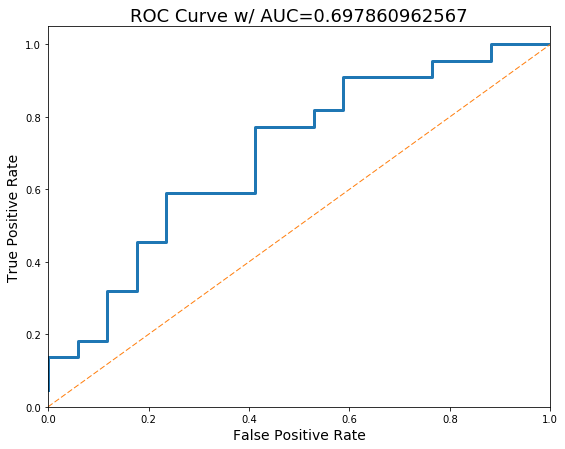

In [34]:
random.seed(1)
# for reproducibility
random.seed(1)

#building the predictive model
#cv_folds=5 
#378/33early_stopping_rounds=50
alg = optim_model
# loading numpy array into dMatrix

#xgb_train = xgb.DMatrix( x_train_s, label=y_train_s)
#xgb_test = xgb.DMatrix( x_test, label=y_test)
    
#Train cross validation
#xgb_param = alg.get_xgb_params()
#cvresult = xgb.cv(xgb_param, xgb_train, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
#                      metrics = ['logloss'], early_stopping_rounds=early_stopping_rounds)
#alg.set_params(n_estimators=cvresult.shape[0])
    
#Fit the algorithm on the data
alg.fit(x_train_s, y_train_s, eval_metric='auc')
#alg.fit(x_train, y_train, eval_metric='logloss')
    
#Predict in training set
y_trpred = alg.predict(x_train_s)
y_trpredprob = alg.predict_proba(x_train_s)[:,1]
    
#Predict in test set
y_pred = alg.predict(x_test)
y_predprob = alg.predict_proba(x_test)[:,1]
    
#Print model report:
print ("\nModel Report")
    
print ("Accuracy (train set): %.4g" % metrics.accuracy_score(y_train_s, y_trpred))
print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train_s, y_trpredprob))
    
print ("Accuracy (test set): %.4g" % metrics.accuracy_score(y_test, y_pred))
print ("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_predprob))    
    
#parte añadida que puede petar
################################################################################
print("Confusion matrix:")
print (metrics.confusion_matrix(y_test, y_pred))
print("Detailed classification report:")
print (metrics.classification_report(y_test, y_pred))
                    
# Computing ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_predprob)

plt.figure(figsize=(9,7))
lw = 3
plt.plot(fpr, tpr, lw=lw)

            
plt.plot([0, 1], [0, 1], lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
#plt.title('Receiver operating characteristic example')
plt.title("ROC Curve w/ AUC=%s" % str(metrics.auc(fpr,tpr)), fontsize = 18)

plt.show()



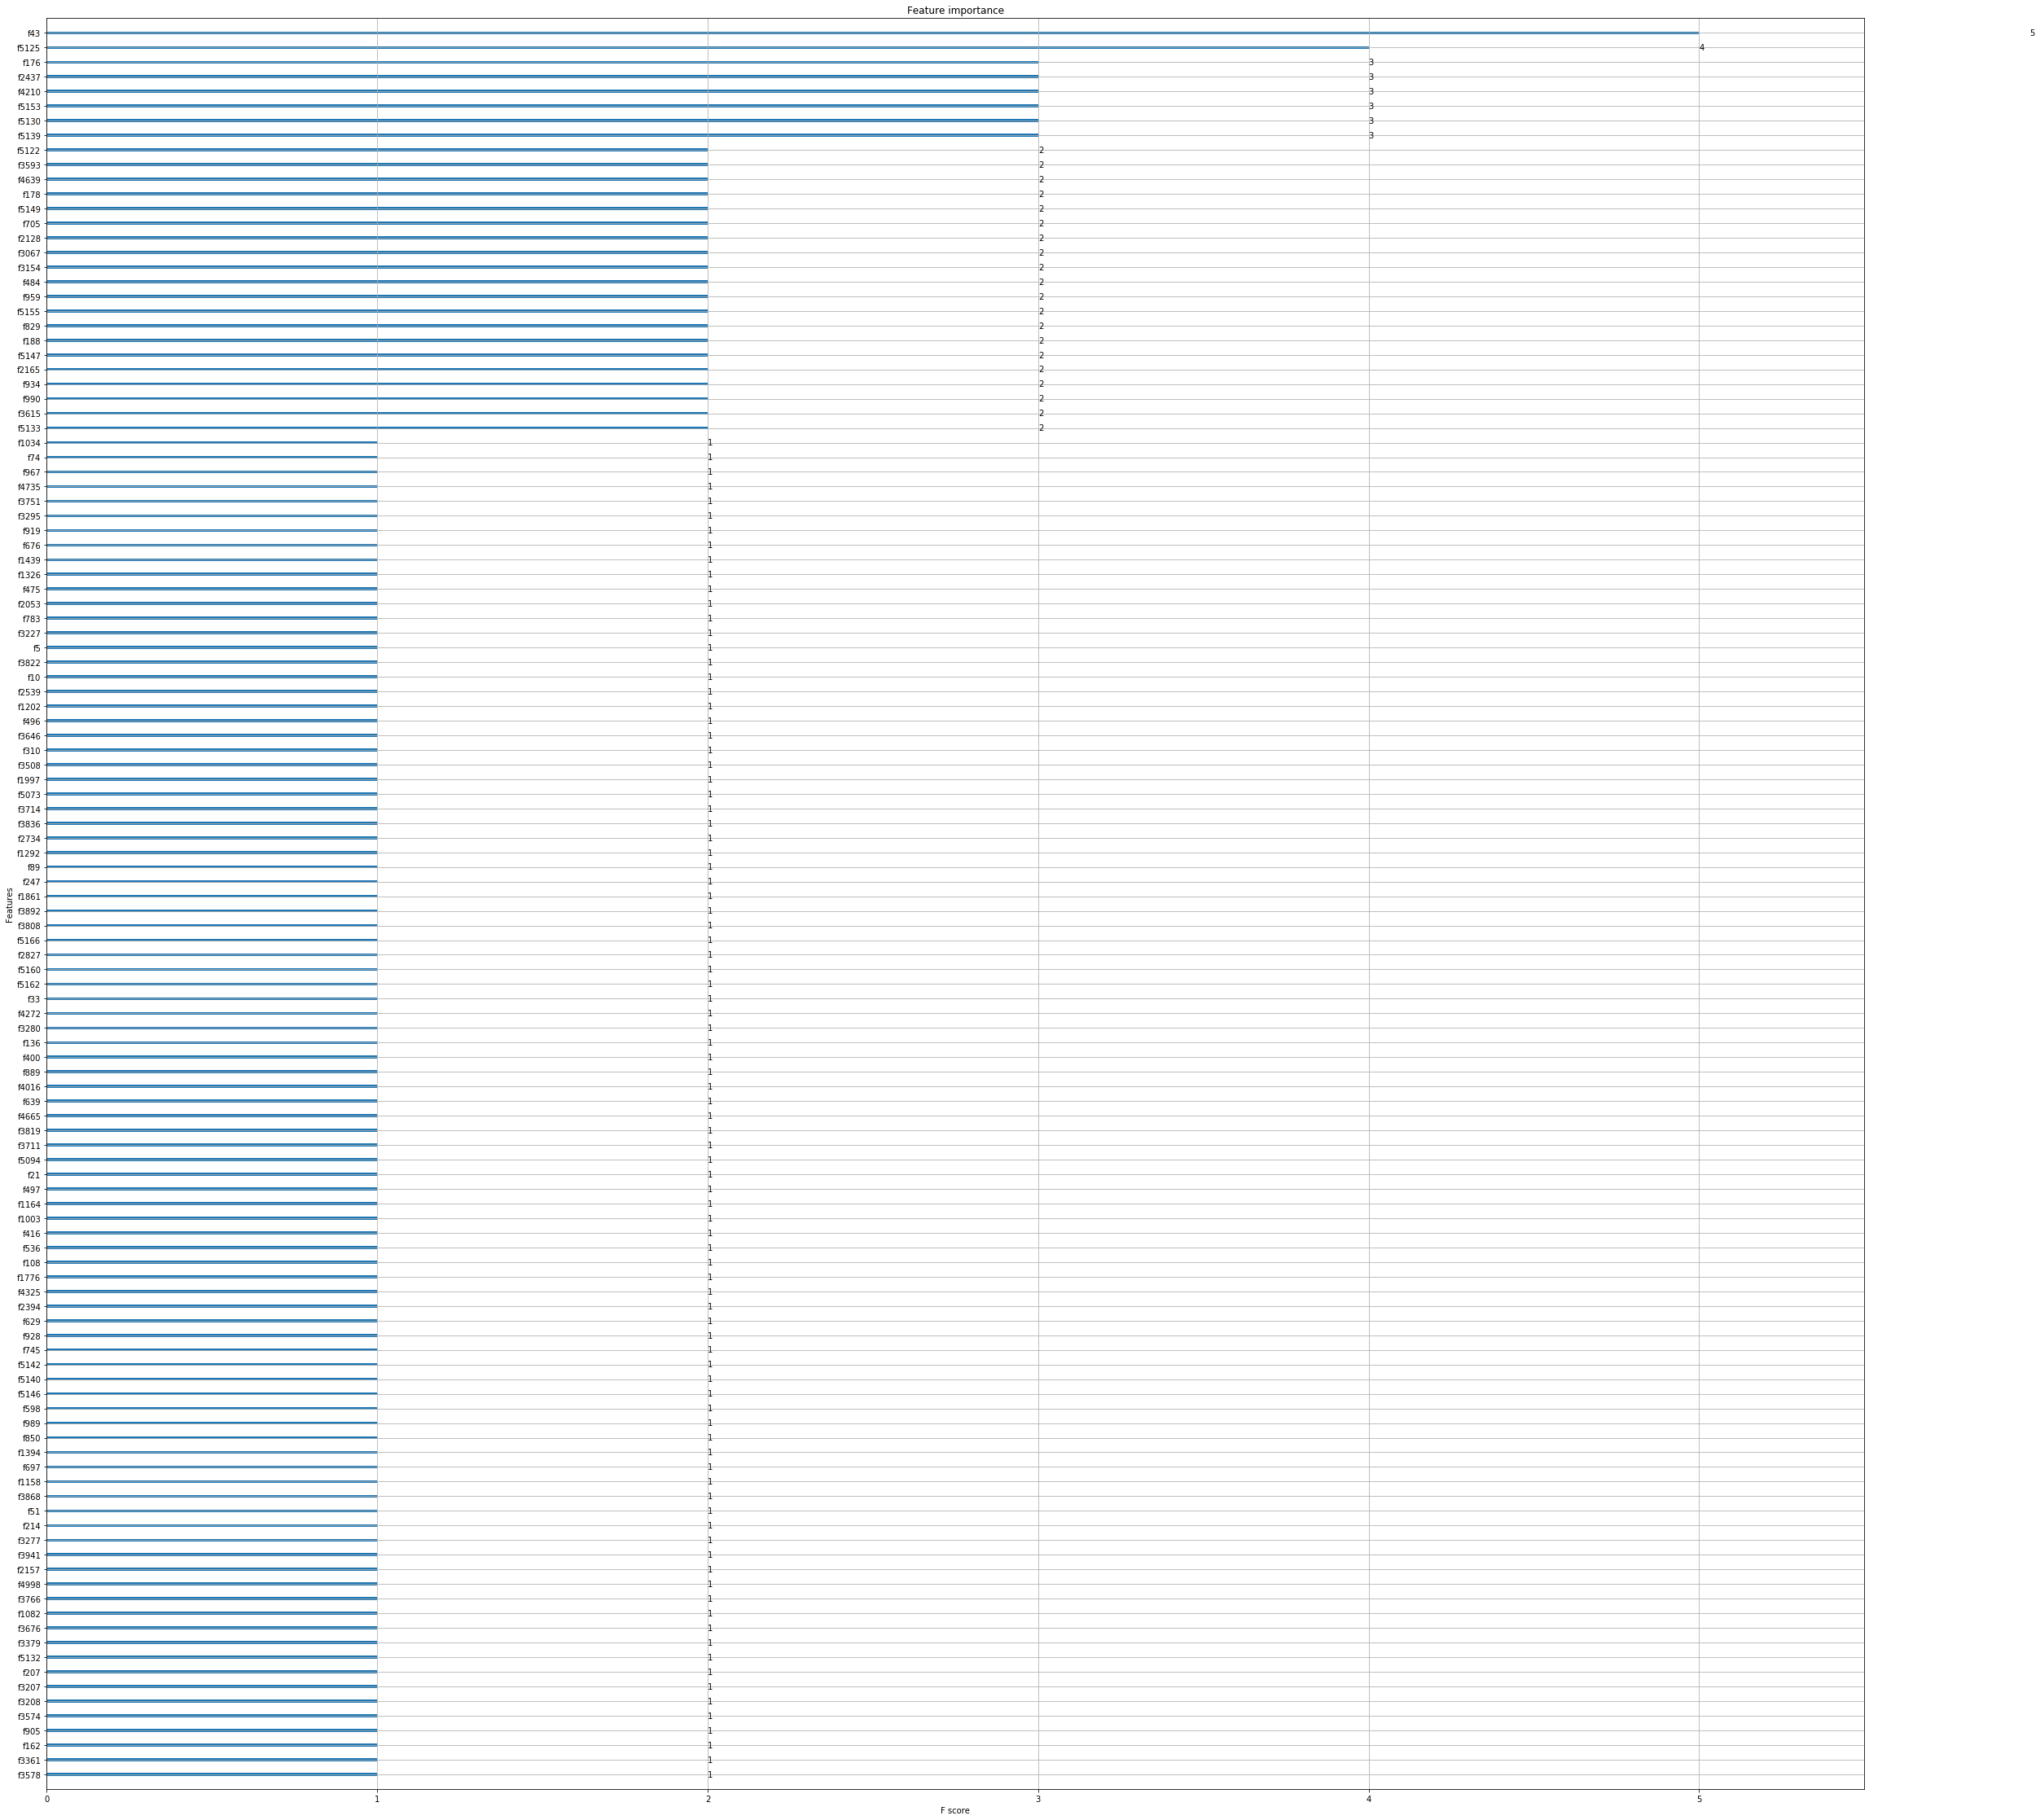

In [35]:
# plot feature importance
plot_importance(alg)
pyplot.show()

In [36]:
#Creating a map of variables to identify the most relevant ones
#Names of the variables
#vars = osm_fp.drop(['ION_ACTIVITY', 'SMILES', 'MOLECULES'], axis=1).columns
vars = osm_fp.drop(['ION_ACTIVITY', 'SMILES'], axis=1).columns
mapping_vars = {}
xgnames = [j + str(i) for i, j in zip(range(len(vars)), ["f"] * len(vars))]
mapping_vars = dict(zip(xgnames, vars))

In [38]:

# Fit model using each importance as a threshold
thresholds = np.arange(0.0, 0.030, 0.005)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(alg, threshold=thresh, prefit=True)
    select_X_train = selection.transform(x_train_s)
    # train model
    #selection_model = XGBClassifier()
    selection_model=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0.4, learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=0.01, reg_lambda=1,
       scale_pos_weight=11.45, seed=0, silent=True, subsample=0.7)
    selection_model.fit(select_X_train, y_train_s)
    # eval model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    y_predprob = selection_model.predict_proba(select_X_test)[:,1]
    
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    rroc_auc = metrics.roc_auc_score(y_test, y_predprob)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
    print("Thresh=%.3f, n=%d, AUC: %.2f%%" % (thresh, select_X_train.shape[1],rroc_auc))
    print (metrics.confusion_matrix(y_test, y_pred))


Thresh=0.000, n=5168, Accuracy: 43.59%
Thresh=0.000, n=5168, AUC: 0.70%
[[17  0]
 [22  0]]
Thresh=0.005, n=120, Accuracy: 43.59%
Thresh=0.005, n=120, AUC: 0.58%
[[17  0]
 [22  0]]
Thresh=0.010, n=28, Accuracy: 43.59%
Thresh=0.010, n=28, AUC: 0.56%
[[17  0]
 [22  0]]
Thresh=0.015, n=8, Accuracy: 35.90%
Thresh=0.015, n=8, AUC: 0.33%
[[14  3]
 [22  0]]
Thresh=0.020, n=2, Accuracy: 41.03%
Thresh=0.020, n=2, AUC: 0.41%
[[15  2]
 [21  1]]
Thresh=0.025, n=2, Accuracy: 41.03%
Thresh=0.025, n=2, AUC: 0.41%
[[15  2]
 [21  1]]


Thresh=0.005, n=72, Accuracy: 43.59%
[[17  0]
 [22  0]]


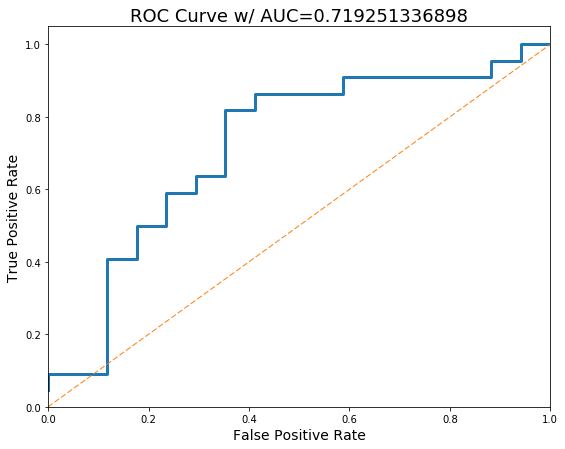

In [176]:
thresh = 0.005
# select features using threshold
selection = SelectFromModel(alg, threshold=thresh, prefit=True)
select_X_train = selection.transform(x_train_s)
# train model
selection_model = XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0.0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=3, missing=None, n_estimators=100, nthread=-1,
       objective=u'binary:logistic', reg_alpha=1e-05, reg_lambda=1,
       scale_pos_weight=11.45, seed=0, silent=True, subsample=0.6)
selection_model.fit(select_X_train, y_train_s)
# eval model
select_X_test = selection.transform(x_test)
y_pred = selection_model.predict(select_X_test)
y_predprob = selection_model.predict_proba(select_X_test)[:,1]
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))
print (metrics.confusion_matrix(y_test, y_pred))

# Computing ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_predprob)

plt.figure(figsize=(9,7))
lw = 3
plt.plot(fpr, tpr, lw=lw)

            
plt.plot([0, 1], [0, 1], lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 14)
plt.ylabel('True Positive Rate', fontsize = 14)
#plt.title('Receiver operating characteristic example')
plt.title("ROC Curve w/ AUC=%s" % str(metrics.auc(fpr,tpr)), fontsize = 18)

plt.show()


# Prediction on the set of marine molecules

In [49]:
# Loading marine molecules list
mm_list = pd.read_csv("marine_molecules.csv", index_col=None, decimal=",", na_values="ND")
mm_list

,NUMBER,S,SMI,SEQUENCE,SMILES
0,#1,S,"3,5-dibromo-4-hydroxybenzaldehyde.smi",SXRHGLQCOLNZPT-UHFFFAOYSA-N,O=Cc1cc(Br)c(O)c(Br)c1
1,#2,S,Alcyopterosin-A.smi,AOZZRIFMYYWXLE-UHFFFAOYSA-N,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2
2,#3,S,Antarcticoside-D.smi,SFEIVGCFQJAPTI-DCOKEWDMSA-N,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...
3,#4,S,Aplicyanin-A.smi,VVONRGQMZKFFRP-UHFFFAOYSA-N,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1
4,#5,S,Asterasterol-C.smi,KDUVNRKZGYTTJS-GACDVITBSA-N,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...
5,#7,S,Austrodoral.smi,CNTXEQHESHSVFZ-UBHSHLNASA-N,CC1(C)CCC[C@@]2(C)[C@H]1CC[C@@]2(C)C=O
6,#9,S,Caminatal.smi,JXMWXFSVMMJDHJ-IKERNBKFSA-N,CC(=O)O[C@@H]1C[C@@](C)(C=O)[C@H](CCC(=O)c2ccc...
7,#10,S,Dendrillin.smi,APHPHCFXAWJFAA-AOGFDJAGSA-N,CC(=O)OC1OC(OC(C)=O)C2C1CC[C@H](C1(C)CCCC(C)(C...
8,#11,S,Dendrinolide.smi,IMIAJJXGLPJMII-CEXWTWQISA-N,CC(=O)O[C@H]1OC=C2CC[C@H](/C(C)=C3/CCCC3(C)C)C...
9,#12,S,Discorhabdin-B.smi,SVKKMXJIWIOCJC-VOJFVSQTSA-N,O=C1C=C2S[C@H]3C[C@]2(C=C1Br)C1=C(N3)C(=O)c2[n...


In [50]:
col_f = ['SMILES'] + fp_names
fpd = pd.DataFrame(columns=col_f, index=mm_list.index.values)
fpd = fpd.fillna(0)
fpd.loc[:, "SMILES"] = mm_list.loc[:, "SMILES"]
mrdk_list = smiles_to_rdkit(fpd.loc[:, "SMILES"])
fpd = fpd.assign(MOLECULES=mrdk_list)
list_fpdescriptors = []
for index, row in fpd.iterrows():
    results = {}
    for fp in fp_names:
        results[fp] = fpdict[fp](row["MOLECULES"])
    np_fps = {}
    for key, value in results.iteritems():
        arr = np.zeros((1,))
        if isinstance(value, DataStructs.cDataStructs.ExplicitBitVect):
            DataStructs.ConvertToNumpyArray(value, arr)
        else:
            if isinstance(value, DataStructs.cDataStructs.UIntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.UIntSparseIntVect.ToBinary(value)
            elif isinstance(value, DataStructs.cDataStructs.IntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.IntSparseIntVect.ToBinary(value)
            else:
                fp_bin = DataStructs.cDataStructs.LongSparseIntVect.ToBinary(value)
            fp_frombin = DataStructs.cDataStructs.CreateFromBinaryText(fp_bin)
            DataStructs.ConvertToNumpyArray(fp_frombin, arr)
        np_fps[key] = arr.tolist()
        #morgan_1024 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 4, nBits=1024)
        #morgan_2048_1 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 1, nBits=2048)
        #morgan_2048_2 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 2, nBits=2048)
        #morgan_2048_3 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 3, nBits=2048)
        #morgan_2048_4 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 4, nBits=2048)
        #morgan_2048_5 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 5, nBits=2048)
        #morgan_2048_6 = AllChem.GetMorganFingerprintAsBitVect(row["MOLECULES"], 6, nBits=2048)
        #topological_2048 = AllChem.GetHashedTopologicalTorsionFingerprintAsBitVect(row["MOLECULES"])
        #macc = AllChem.GetMACCSKeysFingerprint(row["MOLECULES"])
        np_fps.update({'SMILES': row["SMILES"], 'MOLECULES': row["MOLECULES"]})
        #fp_descriptors = {'SMILES': row["SMILES"], 'ION_ACTIVITY': row["ION_ACTIVITY"], 'MOLECULES': row["MOLECULES"],
        #                  'MORGAN1024': morgan_1024, 'MORGAN2048_1': morgan_2048_1, 'MORGAN2048_2': morgan_2048_2,
        #                  'MORGAN2048_3': morgan_2048_3, 'MORGAN2048_4': morgan_2048_4, 'MORGAN2048_5': morgan_2048_5,
        #                  'MORGAN2048_6': morgan_2048_6, 'TOPOLOGICAL2048': topological_2048, 'MACCFP': macc}
    list_fpdescriptors.append(np_fps)
fp_df = pd.DataFrame(list_fpdescriptors)
    
    ################################################################
    #inserted 06/06
for index, row in fp_df.iterrows():
    for fp in fp_names:
        ar_val = np.array(fp_df.ix[index, fp])
        fp_df.set_value(index, fp, ar_val)
            
fp_df = fp_df.drop(['MOLECULES'], axis=1)
fp_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
SMILES    27 non-null object
ecfp6     27 non-null object
fcfp6     27 non-null object
hashap    27 non-null object
hashtt    27 non-null object
rdk7      27 non-null object
dtypes: object(6)
memory usage: 1.3+ KB


In [51]:
"""
Spectrophores descriptor calculator.
"""
sp_names = [j+str(i) for i,j in zip(range(1,49),["sp"] * 48)]
#col_s = two + ['SPECTROPHORES'] + sp_names
col_s = ['SMILES'] + sp_names
spd = pd.DataFrame(columns=col_s, index=mm_list.index.values)
spd = spd.fillna(0)
spd.loc[:, "SMILES"] = mm_list.loc[:, "SMILES"]
mpy_list = smiles_to_pybel(spd.loc[:, "SMILES"])
spd = spd.assign(MOLECULES=mpy_list)
    #spd['SPECTROPHORES'] = spd['SPECTROPHORES'].astype(object)
    #list_spdescriptors = []
    
for index, row in spd.iterrows():
    row["MOLECULES"].make3D()
    spectrophore = pybel.ob.OBSpectrophore()
    spectrophore.SetNormalization(spectrophore.NormalizationTowardsZeroMeanAndUnitStd)
    hey = spectrophore.GetSpectrophore(row["MOLECULES"].OBMol)
    sp_descriptors = {n: d for n, d in zip(sp_names, hey)}
        
    for key in sp_descriptors.keys():
        spd.loc[index, key] = sp_descriptors[key]
    
    
spd = spd.dropna(axis=1, how='all')

In [52]:
spd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 50 columns):
SMILES       27 non-null object
sp1          27 non-null float64
sp2          27 non-null float64
sp3          27 non-null float64
sp4          27 non-null float64
sp5          27 non-null float64
sp6          27 non-null float64
sp7          27 non-null float64
sp8          27 non-null float64
sp9          27 non-null float64
sp10         27 non-null float64
sp11         27 non-null float64
sp12         27 non-null float64
sp13         27 non-null float64
sp14         27 non-null float64
sp15         27 non-null float64
sp16         27 non-null float64
sp17         27 non-null float64
sp18         27 non-null float64
sp19         27 non-null float64
sp20         27 non-null float64
sp21         27 non-null float64
sp22         27 non-null float64
sp23         27 non-null float64
sp24         27 non-null float64
sp25         27 non-null float64
sp26         27 non-null float64
sp27   

In [53]:
fpi_df = fp_individual(fp_df)

In [54]:
fpi_df = quitar_fps(fpi_df)
fpi_df

,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,rdk7_440,...,fcfp6_795,fcfp6_794,fcfp6_410,fcfp6_124,fcfp6_412,fcfp6_413,fcfp6_414,fcfp6_415,fcfp6_416,fcfp6_125
0,O=Cc1cc(Br)c(O)c(Br)c1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CC1(C)CCC[C@@]2(C)[C@H]1CC[C@@]2(C)C=O,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CC(=O)O[C@@H]1C[C@@](C)(C=O)[C@H](CCC(=O)c2ccc...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,CC(=O)OC1OC(OC(C)=O)C2C1CC[C@H](C1(C)CCCC(C)(C...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,CC(=O)O[C@H]1OC=C2CC[C@H](/C(C)=C3/CCCC3(C)C)C...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,O=C1C=C2S[C@H]3C[C@]2(C=C1Br)C1=C(N3)C(=O)c2[n...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
fs_mm = pd.merge(fpi_df, spd, how='inner', on='SMILES')

In [56]:
fs_mm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Columns: 5170 entries, SMILES to MOLECULES
dtypes: float64(5168), object(2)
memory usage: 1.1+ MB


In [57]:
fs_mm.head()

,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,rdk7_440,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,O=Cc1cc(Br)c(O)c(Br)c1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.664989,-0.499596,-0.419580,-1.065115,1.669854,0.508382,0.143208,0.345159,1.147070,O=Cc1cc(Br)c(O)c(Br)c1\t\n
1,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.108862,-0.503353,-0.835538,-1.507617,1.429696,1.176118,-0.384798,-0.618017,0.643982,Cc1cc2c(c(C)c1CCCl)CC(C)(C)C2\t\n
2,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.348568,0.973312,0.030567,-2.023398,0.596677,0.356552,0.174673,1.045605,0.569630,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...
3,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.872291,-0.487360,-0.739683,-1.412728,1.369047,0.728912,0.382301,0.124338,0.755899,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1\t\n
4,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.483993,-0.125358,0.004980,-2.102276,1.626600,0.866564,-0.371123,-0.001514,0.516249,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...


In [58]:
# Converting descriptors dataframe to array and pre-processing
mm_smiles = fs_mm.loc[:,"SMILES"]
mm_array = fs_mm.drop(["SMILES", "MOLECULES"], axis=1).values

In [59]:
mm_array

array([[ 0.        ,  0.        ,  1.        , ...,  0.14320762,
         0.3451593 ,  1.14706965],
       [ 0.        ,  1.        ,  1.        , ..., -0.38479801,
        -0.61801701,  0.64398191],
       [ 0.        ,  1.        ,  1.        , ...,  0.17467274,
         1.04560511,  0.5696302 ],
       ..., 
       [ 1.        ,  1.        ,  0.        , ...,  0.07039056,
         0.2341901 ,  0.75317044],
       [ 0.        ,  1.        ,  1.        , ...,  1.03071997,
         1.41540203,  0.78889118],
       [ 1.        ,  1.        ,  1.        , ..., -0.39352265,
        -0.66954562,  1.06830876]])

In [60]:
mm_array = preprocessing.scale(mm_array)

In [63]:
# Predicting marine molecules active against malaria from feature selection model

#Predicting marine molecules active against malaria from model stored in alg
#optim_model.fit(x_train_s, y_train_s, eval_metric='auc')
y_pred_mm = alg.predict(mm_array)
mm_pred_df = pd.Series(data=y_pred_mm)
#Removing descriptors under the importance threshold
#select_X_mm = selection.transform(mm_array)
##selection_model.fit(select_X_mm, y_train_s, eval_metric='auc')
#y_pred_mm = selection_model.predict(select_X_mm)
#mm_pred_df = pd.Series(data=y_pred_mm)
mm_pred_df

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
dtype: float64

In [64]:
#y_predprob_mm = selection_model.predict_proba(select_X_mm)[:,1]
y_predprob_mm = alg.predict_proba(mm_array)[:,1]
mm_predprob_df = pd.Series(data=y_predprob_mm)

In [65]:
#Preparing results
mm_results = pd.concat([mm_list, mm_pred_df, mm_predprob_df], axis=1)
mm_results.columns = ['NUMBER', '#', 'NAME', 'INCHI_KEY','SMILES', 'ACTIVITY', 'ACTIVITY_PROBABILITY']
mm_pred_df.value_counts()

0.0    27
dtype: int64

In [66]:
mm_results.sort_values('ACTIVITY_PROBABILITY', ascending=False)

,NUMBER,#,NAME,INCHI_KEY,SMILES,ACTIVITY,ACTIVITY_PROBABILITY
16,#20,S,Palmerolide-A.smi,HEOKDDVDVGNHMR-ABVIYVDXSA-N,CC(C)=CC(=O)N/C=C/C(C)=C/[C@@H](C)[C@H]1C/C(C)...,0.0,0.127604
8,#11,S,Dendrinolide.smi,IMIAJJXGLPJMII-CEXWTWQISA-N,CC(=O)O[C@H]1OC=C2CC[C@H](/C(C)=C3/CCCC3(C)C)C...,0.0,0.126537
14,#18,S,Membranolide.smi,YWRLUOURIMRHED-ASSNKEHSSA-N,COC(=O)[C@H](C)c1c([C@@]2(C)CCCC(C)(C)C2)ccc2c...,0.0,0.071786
13,#16,S,Hodgsonal.smi,FGOJRPSZZSBOHD-XPYUAMARSA-N,CC(=O)O[C@H]1CC(C)(C)[C@@H]2CC=C(C(C)=O)[C@H](...,0.0,0.048513
24,#29,S,Suberitenone-A.smi,JANWLMMGERLQDI-MMKNOJKJSA-N,CC(=O)O[C@@H]1C[C@@]2(C)C=C([C@H]3CC(=O)C(C)=C...,0.0,0.043330
17,#22,S,Polyrhaphin-A.smi,QFFIZAQCLHVQCV-DIGFTJECSA-N,C=C1CCCC(C)(C)[C@@H]2CC[C@@](C)([C@H](COC(C)=O...,0.0,0.033267
2,#3,S,Antarcticoside-D.smi,SFEIVGCFQJAPTI-DCOKEWDMSA-N,COC1C(O)COC(OC[C@@H](C)C/C=C/C(C)[C@H]2C[C@@H]...,0.0,0.022540
19,#24,S,Pteroenone.smi,DVSSWRPHWSGOFM-GXTWGEPZSA-N,C/C=C(C)/C=C(\C)[C@@H](O)[C@@H](C)C(=O)CCC,0.0,0.015591
11,#14,S,Focardin.smi,CHAVWXSUVDIUSK-VELITEBHSA-N,CC(C)=CC/C=C(/C)[C@H]1CCC2CCC=C3CO[C@H](O)C3[C...,0.0,0.011099
3,#4,S,Aplicyanin-A.smi,VVONRGQMZKFFRP-UHFFFAOYSA-N,N=C1NCCC(c2c[nH]c3ccc(Br)cc23)N1,0.0,0.009664


In [67]:
mm_results.sort_values('ACTIVITY_PROBABILITY', ascending=False).to_csv("mm_activity_fps.csv")

In [226]:
#Predicting with the whole model
#optim_model.fit(x_train_s, y_train_s, eval_metric='auc')
#y_pred_mm = optim_model.predict(mm_array)
#mm_pred_df = pd.Series(data=y_pred_mm)
#mm_pred_df

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
dtype: float64

In [227]:
#y_predprob_mm = optim_model.predict_proba(mm_array)[:,1]
#mm_predprob_df = pd.Series(data=y_predprob_mm)

In [228]:
#Preparing results
#mm_results = pd.concat([mm_list, mm_pred_df, mm_predprob_df], axis=1)
#mm_results.columns = ['NUMBER', '#', 'NAME', 'INCHI_KEY','SMILES', 'ACTIVITY', 'ACTIVITY_PROBABILITY']
#mm_pred_df.value_counts()

0.0    27
dtype: int64

In [229]:
#mm_results.sort_values('ACTIVITY_PROBABILITY', ascending=False)

,NUMBER,#,NAME,INCHI_KEY,SMILES,ACTIVITY,ACTIVITY_PROBABILITY
8,#11,S,Dendrinolide.smi,IMIAJJXGLPJMII-CEXWTWQISA-N,CC(=O)O[C@H]1OC=C2CC[C@H](/C(C)=C3/CCCC3(C)C)C...,0.0,0.372585
16,#20,S,Palmerolide-A.smi,HEOKDDVDVGNHMR-ABVIYVDXSA-N,CC(C)=CC(=O)N/C=C/C(C)=C/[C@@H](C)[C@H]1C/C(C)...,0.0,0.186102
24,#29,S,Suberitenone-A.smi,JANWLMMGERLQDI-MMKNOJKJSA-N,CC(=O)O[C@@H]1C[C@@]2(C)C=C([C@H]3CC(=O)C(C)=C...,0.0,0.127314
13,#16,S,Hodgsonal.smi,FGOJRPSZZSBOHD-XPYUAMARSA-N,CC(=O)O[C@H]1CC(C)(C)[C@@H]2CC=C(C(C)=O)[C@H](...,0.0,0.117234
14,#18,S,Membranolide.smi,YWRLUOURIMRHED-ASSNKEHSSA-N,COC(=O)[C@H](C)c1c([C@@]2(C)CCCC(C)(C)C2)ccc2c...,0.0,0.115953
17,#22,S,Polyrhaphin-A.smi,QFFIZAQCLHVQCV-DIGFTJECSA-N,C=C1CCCC(C)(C)[C@@H]2CC[C@@](C)([C@H](COC(C)=O...,0.0,0.095825
23,#28,S,Suberiphenol.smi,CCXWTNLPPHXPFG-IWRPRKENSA-N,CC(=O)O[C@@H]1C[C@@]2(C)CC(c3ccc(C)c(O)c3)=CC[...,0.0,0.037038
4,#5,S,Asterasterol-C.smi,KDUVNRKZGYTTJS-GACDVITBSA-N,CC(C/C=C/[C@@H](C)[C@H]1CC[C@H]2C3=CC(=O)[C@H]...,0.0,0.032072
21,#26,S,Spongothymidine.smi,DWRXFEITVBNRMK-JAGXHNFQSA-N,Cc1cn([C@@H]2O[C@H](CO)[C@@H](O)[C@@H]2O)c(=O)...,0.0,0.029132
20,#25,S,Rossinone-A.smi,RLXJEEFFCLVVPH-HXUWFJFHSA-N,CC(C)=C[C@@H](O)C(=O)/C(C)=C/CC/C(C)=C/Cc1cc(O...,0.0,0.020802


# Prediction on the set of DrugBank database

In [68]:
drugbank_list = pd.read_csv("DrugBank_list.csv", index_col=None, decimal=",", na_values="ND", sep=",")
#Dropping NAs from the list (not valid molecules)
drugbank_mod = drugbank_list.dropna()
drugbank_mod2 = drugbank_mod[~drugbank_mod['SMILES'].str.contains('RelatedMol:')]
drugbank_mod2 = drugbank_mod2.reset_index(drop=True)
drugbank_mod2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Data columns (total 5 columns):
NUMBER      6537 non-null object
S           6537 non-null object
NAME        6537 non-null object
SEQUENCE    6537 non-null object
SMILES      6537 non-null object
dtypes: object(5)
memory usage: 255.4+ KB


In [69]:
col_f = ['SMILES'] + fp_names
fpd = pd.DataFrame(columns=col_f, index=drugbank_mod2.index.values)
fpd = fpd.fillna(0)
fpd.loc[:, "SMILES"] = drugbank_mod2.loc[:, "SMILES"]
mrdk_list = smiles_to_rdkit(fpd.loc[:, "SMILES"])
fpd = fpd.assign(MOLECULES=mrdk_list)
list_fpdescriptors = []
for index, row in fpd.iterrows():
    results = {}
    for fp in fp_names:
        results[fp] = fpdict[fp](row["MOLECULES"])
    np_fps = {}
    for key, value in results.iteritems():
        arr = np.zeros((1,))
        if isinstance(value, DataStructs.cDataStructs.ExplicitBitVect):
            DataStructs.ConvertToNumpyArray(value, arr)
        else:
            if isinstance(value, DataStructs.cDataStructs.UIntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.UIntSparseIntVect.ToBinary(value)
            elif isinstance(value, DataStructs.cDataStructs.IntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.IntSparseIntVect.ToBinary(value)
            else:
                fp_bin = DataStructs.cDataStructs.LongSparseIntVect.ToBinary(value)
            fp_frombin = DataStructs.cDataStructs.CreateFromBinaryText(fp_bin)
            DataStructs.ConvertToNumpyArray(fp_frombin, arr)
        np_fps[key] = arr.tolist()
        
        np_fps.update({'SMILES': row["SMILES"],  'MOLECULES': row["MOLECULES"]})
       
    list_fpdescriptors.append(np_fps)
fp_db = pd.DataFrame(list_fpdescriptors)
    
    ################################################################
    #inserted 06/06
for index, row in fp_db.iterrows():
    for fp in fp_names:
        ar_val = np.array(fp_db.ix[index, fp])
        fp_db.set_value(index, fp, ar_val)
            
fp_db = fp_db.drop(['MOLECULES'], axis=1)
fp_db.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Data columns (total 6 columns):
SMILES    6537 non-null object
ecfp6     6537 non-null object
fcfp6     6537 non-null object
hashap    6537 non-null object
hashtt    6537 non-null object
rdk7      6537 non-null object
dtypes: object(6)
memory usage: 306.5+ KB


In [70]:
fp_db.head()

,SMILES,ecfp6,fcfp6,hashap,hashtt,rdk7
0,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ..."
1,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ..."
2,N[C@@H](Cc1cnc[nH]1)C(=O)O,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, ..."
3,C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(...,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
4,CC(=O)C(=O)O,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [71]:
"""
Spectrophores descriptor calculator.
"""
sp_names = [j+str(i) for i,j in zip(range(1,49),["sp"] * 48)]
#col_s = two + ['SPECTROPHORES'] + sp_names
col_s = ['SMILES'] + sp_names
spd = pd.DataFrame(columns=col_s, index=drugbank_mod2.index.values)
spd = spd.fillna(0)
spd.loc[:, "SMILES"] = drugbank_mod2.loc[:, "SMILES"]
mpy_list = smiles_to_pybel(spd.loc[:, "SMILES"])
spd = spd.assign(MOLECULES=mpy_list)
    #spd['SPECTROPHORES'] = spd['SPECTROPHORES'].astype(object)
    #list_spdescriptors = []
    
for index, row in spd.iterrows():
    row["MOLECULES"].make3D()
    spectrophore = pybel.ob.OBSpectrophore()
    spectrophore.SetNormalization(spectrophore.NormalizationTowardsZeroMeanAndUnitStd)
    hey = spectrophore.GetSpectrophore(row["MOLECULES"].OBMol)
    sp_descriptors = {n: d for n, d in zip(sp_names, hey)}
        
    for key in sp_descriptors.keys():
        spd.loc[index, key] = sp_descriptors[key]
    
    
spd = spd.dropna(axis=1, how='all')

In [72]:
spd.head()

,SMILES,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,-1.433393,-1.389700,-1.371866,-0.295543,0.591491,0.615799,0.331552,-0.092128,0.164659,...,1.017331,-0.345507,-0.815234,-1.470397,1.298184,1.302389,-0.438516,-0.767505,0.423312,Cc1ncc(COP(=O)(O)O)c(C=O)c1O\t\n
1,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,-1.336704,-1.138520,0.492551,0.243892,-1.054245,-0.126597,-1.191268,0.771756,1.955838,...,0.854990,-0.643672,-0.445732,-1.937552,1.571561,1.043609,-0.147228,-0.517950,0.411872,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...
2,N[C@@H](Cc1cnc[nH]1)C(=O)O,-0.738204,-1.528898,-0.881135,-0.835536,0.832882,-0.748992,-0.601921,0.853734,0.935232,...,1.005321,-0.597518,-0.290807,-1.414400,1.239858,1.134248,-0.088807,0.268496,0.449911,N[C@@H](Cc1cnc[nH]1)C(=O)O\t\n
3,C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(...,-1.599163,-1.667870,0.388042,0.866092,-0.092416,-0.724174,-1.068699,0.808165,0.899598,...,0.928539,0.595507,-0.862608,-1.761515,0.490628,0.854592,0.578467,0.457760,0.339501,C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(...
4,CC(=O)C(=O)O,-1.108868,-1.492229,-1.273226,-0.120251,0.082307,0.878047,-0.336527,-0.317257,0.338427,...,1.017156,-0.745571,-0.445191,-1.300730,1.308416,0.672271,-0.363331,-0.144130,1.085217,CC(=O)C(=O)O\t\n


In [73]:
fpi_db = fp_individual(fp_db)

In [74]:
fpi_db = quitar_fps(fpi_db)
fpi_db

,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,rdk7_440,...,fcfp6_795,fcfp6_794,fcfp6_410,fcfp6_124,fcfp6_412,fcfp6_413,fcfp6_414,fcfp6_415,fcfp6_416,fcfp6_125
0,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,N[C@@H](Cc1cnc[nH]1)C(=O)O,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CC(=O)C(=O)O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,N[C@@H](Cc1ccccc1)C(=O)O,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,O=C(O)CCCC[C@@H]1SC[C@@H]2NC(=O)N[C@H]12,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C[N+](C)(C)CCO,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,NCCCC[C@H](N)C(=O)O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,N=C(N)NCCC[C@H](N)C(=O)O,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Columns: 5121 entries, SMILES to fcfp6_125
dtypes: float64(5120), object(1)
memory usage: 255.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Data columns (total 5 columns):
NUMBER      6537 non-null object
S           6537 non-null object
NAME        6537 non-null object
SEQUENCE    6537 non-null object
SMILES      6537 non-null object
dtypes: object(5)
memory usage: 255.4+ KB


In [76]:
fs_db = pd.merge(fp_db_post, spd, how='inner', on='SMILES')

In [77]:
fs_db.head()

,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,rdk7_440,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,Cc1ncc(COP(=O)(O)O)c(C=O)c1O,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.017331,-0.345507,-0.815234,-1.470397,1.298184,1.302389,-0.438516,-0.767505,0.423312,Cc1ncc(COP(=O)(O)O)c(C=O)c1O\t\n
1,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.854990,-0.643672,-0.445732,-1.937552,1.571561,1.043609,-0.147228,-0.517950,0.411872,Nc1nc(=O)c2c([nH]1)NCC(CNc1ccc(C(=O)N[C@@H](CC...
2,N[C@@H](Cc1cnc[nH]1)C(=O)O,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.005321,-0.597518,-0.290807,-1.414400,1.239858,1.134248,-0.088807,0.268496,0.449911,N[C@@H](Cc1cnc[nH]1)C(=O)O\t\n
3,C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.928539,0.595507,-0.862608,-1.761515,0.490628,0.854592,0.578467,0.457760,0.339501,C[S+](CC[C@H](N)C(=O)O)C[C@H]1O[C@@H](n2cnc3c(...
4,CC(=O)C(=O)O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.017156,-0.745571,-0.445191,-1.300730,1.308416,0.672271,-0.363331,-0.144130,1.085217,CC(=O)C(=O)O\t\n


In [89]:
# Checking duplicated rows
#fp_db = fp_db.drop_duplicates()


#Check NaN rows and remove
nan_rows = fs_db.index[fs_db.isnull().any(axis=1)]
fs_db_post = fs_db[~fs_db.isnull().any(axis=1)]
fs_db_post = fs_db_post.reset_index(drop=True)

#Removing these rows in the original list
drugbank_mod3 = drugbank_mod2[~fs_db.isnull().any(axis=1)]
drugbank_mod3 = drugbank_mod3.reset_index(drop=True)
fs_db_post.info()
drugbank_mod3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Columns: 5170 entries, SMILES to MOLECULES
dtypes: float64(5168), object(2)
memory usage: 257.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6536 entries, 0 to 6535
Data columns (total 5 columns):
NUMBER      6536 non-null object
S           6536 non-null object
NAME        6536 non-null object
SEQUENCE    6536 non-null object
SMILES      6536 non-null object
dtypes: object(5)
memory usage: 255.4+ KB


In [90]:
# Converting descriptors dataframe to array and pre-processing
drugbank_smiles = fs_db_post.loc[:,"SMILES"]
drugbank_array = fs_db_post.drop(['SMILES', 'MOLECULES'], axis=1).values



In [91]:
#fs_db.isnull().sum()

In [92]:
# Scaling data
drugbank_a_pre = preprocessing.scale(drugbank_array)

In [93]:
# Predicting DrugBank molecules active against malaria with feature selected model
#select_drugbank = selection.transform(drugbank_a_pre)
y_pred_db = alg.predict(drugbank_a_pre)
db_pred_df = pd.Series(data=y_pred_db)

In [94]:
#y_predprob_db = selection_model.predict_proba(select_drugbank)[:,1]
y_predprob_db = alg.predict_proba(drugbank_a_pre)[:,1]

db_predprob_df = pd.Series(data=y_predprob_db)

In [97]:
drugbank_results = pd.concat([drugbank_mod3, db_pred_df, db_predprob_df], axis=1)
drugbank_results.columns = ['NUMBER', 'S', 'NAME', 'INCHI_KEY','SMILES', 'ACTIVITY_LABEL', 'ACTIVITY_PROBABILITY']
#drugbank_results.to_csv("drugbank_activity.csv")
db_pred_df.value_counts()

0.0    6482
1.0      54
dtype: int64

In [98]:
drugbank_results.sort_values('ACTIVITY_PROBABILITY', ascending=False)

,NUMBER,S,NAME,INCHI_KEY,SMILES,ACTIVITY_LABEL,ACTIVITY_PROBABILITY
6185,#6741,S,enzalutamide,WXCXUHSOUPDCQV-UHFFFAOYSA-N,CNC(=O)c1ccc(N2C(=S)N(c3ccc(C#N)c(C(F)(F)F)c3)...,1.0,0.931825
5293,#5814,S,3-[(2*2-dimethylpropanoyl)amino]-n-1*3-thiazol...,CAVCWRXFMNCBCM-UHFFFAOYSA-N,CC(C)(C)C(=O)Nc1cccnc1C(=O)Nc1nccs1,1.0,0.915697
4398,#4891,S,2-chloro-5-(3-chloro-phenyl)-6-[(4-cyano-pheny...,JVWHVGIRXILXMU-XMMPIXPASA-N,Cn1cncc1[C@H](OCc1nc(Cl)c(C#N)cc1-c1cccc(Cl)c1...,1.0,0.913096
1711,#1846,S,(s*r)-fidarestat,WNKANLGXFYVJAI-QPUJVOFHSA-N,[NH]C(=O)[C@@H]1C[C@@]2(NC(=O)NC2=O)c2cc(F)ccc2O1,1.0,0.909852
1060,#1133,S,desonide,WBGKWQHBNHJJPZ-LECWWXJVSA-N,CC1(C)O[C@@H]2C[C@H]3[C@@H]4CCC5=CC(=O)C=C[C@]...,1.0,0.905490
1280,#1373,S,ketazolam,PWAJCNITSBZRBL-UHFFFAOYSA-N,CC1=CC(=O)N2CC(=O)N(C)c3ccc(Cl)cc3C2(c2ccccc2)O1,1.0,0.884512
5276,#5796,S,isopropyl (2s)-2-ethyl-7-fluoro-3-oxo-3*4-dihy...,KELNNWMENBUHNS-NSHDSACASA-N,CC[C@H]1C(=O)Nc2ccc(F)cc2N1C(=O)OC(C)C,1.0,0.879891
2804,#3085,S,tazobactam trans-enamine intermediate,OTGPWYNMEILGRB-WPRPVWTQSA-O,C[C@](Cn1ccnn1)([C@@H](N/C=C/C=O)C(=O)O)[S+](=...,1.0,0.874138
2343,#2559,S,cis-[4*5-bis-(4-bromophenyl)-2-(2-ethoxy-4-met...,PVRYEWOXWGDQHA-FQLXRVMXSA-N,CCOc1cc(OC)ccc1C1=N[C@H](c2ccc(Br)cc2)[C@@H](c...,1.0,0.863557
3540,#3912,S,bilh 434,KNRVCCXHLSHTFW-SEAFADMZSA-N,Cc1ccc2c(c1)C(=O)[C@@]1(O[C@H](c3ccc(Cl)c(Cl)c...,1.0,0.857489


In [99]:
drugbank_results.sort_values('ACTIVITY_PROBABILITY', ascending=False).to_csv("db_activity_fps.csv")

In [331]:
from sklearn.decomposition import PCA
# haciendo funcion para calcular pcas
def plotting_pcas(df, fp):
    
    df_new = df.loc[:,('SMILES', 'MOLECULES', 'ION_ACTIVITY', fp)]
    
    #fp_individual adaptation
    for index, row in df_new.iterrows():
        name_fp = [j+"_"+str(i) for i, j in zip(range(1,nbits+1), [fp]*(nbits+1))]
        hey = df_new.loc[index, fp]
        fps = {n: d for n, d in zip(name_fp, hey)}
        for key in fps.keys():
            df_new.loc[index, key] = fps[key]
    
    
    dfi_new = df_new.drop(df_new[df_new.ION_ACTIVITY == 0.5].index)
    dfi_new = dfi_new.drop(['SMILES', 'MOLECULES', fp], axis=1)
    # Removing non-numeric variables
    npdesc = dfi_new.drop(['ION_ACTIVITY'], axis=1).values
    labdesc = dfi_new.ix[:, "ION_ACTIVITY"].values
    
    #return npdesc
    npdesc = preprocessing.scale(npdesc)
    
    pca = PCA(n_components=2)
    
    pc_tr = pca.fit_transform(npdesc)
    
    print("Explained variance by principal components are %s" % pca.explained_variance_ratio_)
    pca_tr_l = np.concatenate((pc_tr, nplab[:, None]), axis=1) 
    plt.plot(pca_tr_l[pca_tr_l[:,2]==0.0,0],pca_tr_l[pca_tr_l[:,2]==0.0,1], 'o', markersize=7, color='blue', alpha=0.5, label='inactives')
    plt.plot(pca_tr_l[pca_tr_l[:,2]==1.0,0],pca_tr_l[pca_tr_l[:,2]==1.0,1], '^', markersize=7, color='red', alpha=0.5, label='actives')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
#plt.xlim([-4,4])
#plt.ylim([-4,4])
    plt.legend()
    plt.title('PCA')

    plt.show()

# Predicting on new sets of molecules

In [45]:
# Loading marine molecules list
malaria_mol = pd.read_csv("~/Open_Malaria_2/Open_Malaria_2/Noves_molecules/lista_molecules.csv", header=None, index_col=None, decimal=",", sep=";", na_values="ND")
malaria_mol.columns=['SMILES', 'ID']
malaria_mol

,0,1
0,C[C@@H]1C(=O)[C@H]([C@@H](CCC2=C[C@H](C3=C(C[C...,coralloidolide_b
1,CC1=C[C@@H]2CC(C[C@H]1[C@]3([C@@]2(CC3)OC(=O)C...,paesslerin_a
2,C1CC[C@@](C)(C)C2CC[C@]3(C)[C@@H](C(OC(CO)CO)=...,austrodoris_4
3,C1[C@]2([H])[C@@](CC[C@@H]([C@]2(CCC(CC(=O)OC(...,austrodoris_5
4,C1CC=C(C)[C@@]2(C)C[C@H](O)[C@H](C)[C@@](C)(CC...,austrodoris_9
5,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)COC(=O)C)[C@@...,austrodoris_1a
6,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)CO)[C@@]2(C)C...,austrodoris_1b
7,C=C1[C@]2(CC[C@@]([C@](CC/C(C/C(OC(CO)CO)=O)/C...,austrodoris_2
8,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,austrodoris_3a
9,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,austrodoris_3b


In [49]:
col_f = ['SMILES'] + fp_names
fpd = pd.DataFrame(columns=col_f, index=malaria_mol.index.values)
fpd = fpd.fillna(0)
fpd.loc[:, "SMILES"] = malaria_mol.loc[:, "SMILES"]
mrdk_list = smiles_to_rdkit(fpd.loc[:, "SMILES"])
fpd = fpd.assign(MOLECULES=mrdk_list)
list_fpdescriptors = []
for index, row in fpd.iterrows():
    results = {}
    for fp in fp_names:
        results[fp] = fpdict[fp](row["MOLECULES"])
    np_fps = {}
    for key, value in results.iteritems():
        arr = np.zeros((1,))
        if isinstance(value, DataStructs.cDataStructs.ExplicitBitVect):
            DataStructs.ConvertToNumpyArray(value, arr)
        else:
            if isinstance(value, DataStructs.cDataStructs.UIntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.UIntSparseIntVect.ToBinary(value)
            elif isinstance(value, DataStructs.cDataStructs.IntSparseIntVect):
                fp_bin = DataStructs.cDataStructs.IntSparseIntVect.ToBinary(value)
            else:
                fp_bin = DataStructs.cDataStructs.LongSparseIntVect.ToBinary(value)
            fp_frombin = DataStructs.cDataStructs.CreateFromBinaryText(fp_bin)
            DataStructs.ConvertToNumpyArray(fp_frombin, arr)
        np_fps[key] = arr.tolist()
        np_fps.update({'SMILES': row["SMILES"], 'MOLECULES': row["MOLECULES"]})
    list_fpdescriptors.append(np_fps)
fp_df = pd.DataFrame(list_fpdescriptors)
    
    ################################################################
    #inserted 06/06
for index, row in fp_df.iterrows():
    for fp in fp_names:
        ar_val = np.array(fp_df.ix[index, fp])
        fp_df.set_value(index, fp, ar_val)
            
fp_df = fp_df.drop(['MOLECULES'], axis=1)
fp_df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
SMILES    12 non-null object
ecfp6     12 non-null object
fcfp6     12 non-null object
hashap    12 non-null object
hashtt    12 non-null object
rdk7      12 non-null object
dtypes: object(6)
memory usage: 648.0+ bytes


In [50]:
fp_df

,SMILES,ecfp6,fcfp6,hashap,hashtt,rdk7
0,C[C@@H]1C(=O)[C@H]([C@@H](CCC2=C[C@H](C3=C(C[C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
1,CC1=C[C@@H]2CC(C[C@H]1[C@]3([C@@]2(CC3)OC(=O)C...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, ..."
2,C1CC[C@@](C)(C)C2CC[C@]3(C)[C@@H](C(OC(CO)CO)=...,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ..."
3,C1[C@]2([H])[C@@](CC[C@@H]([C@]2(CCC(CC(=O)OC(...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
4,C1CC=C(C)[C@@]2(C)C[C@H](O)[C@H](C)[C@@](C)(CC...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
5,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)COC(=O)C)[C@@...,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
6,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)CO)[C@@]2(C)C...,"[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
7,C=C1[C@]2(CC[C@@]([C@](CC/C(C/C(OC(CO)CO)=O)/C...,"[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
8,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."
9,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,"[1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, ..."


In [51]:
"""
Spectrophores descriptor calculator.
"""
sp_names = [j+str(i) for i,j in zip(range(1,49),["sp"] * 48)]
#col_s = two + ['SPECTROPHORES'] + sp_names
col_s = ['SMILES'] + sp_names
spd = pd.DataFrame(columns=col_s, index=malaria_mol.index.values)
spd = spd.fillna(0)
spd.loc[:, "SMILES"] = malaria_mol.loc[:, "SMILES"]
mpy_list = smiles_to_pybel(spd.loc[:, "SMILES"])
spd = spd.assign(MOLECULES=mpy_list)
    #spd['SPECTROPHORES'] = spd['SPECTROPHORES'].astype(object)
    #list_spdescriptors = []
    
for index, row in spd.iterrows():
    row["MOLECULES"].make3D()
    spectrophore = pybel.ob.OBSpectrophore()
    spectrophore.SetNormalization(spectrophore.NormalizationTowardsZeroMeanAndUnitStd)
    hey = spectrophore.GetSpectrophore(row["MOLECULES"].OBMol)
    sp_descriptors = {n: d for n, d in zip(sp_names, hey)}
        
    for key in sp_descriptors.keys():
        spd.loc[index, key] = sp_descriptors[key]
    
    
spd = spd.dropna(axis=1, how='all')

In [52]:
spd

,SMILES,sp1,sp2,sp3,sp4,sp5,sp6,sp7,sp8,sp9,...,sp40,sp41,sp42,sp43,sp44,sp45,sp46,sp47,sp48,MOLECULES
0,C[C@@H]1C(=O)[C@H]([C@@H](CCC2=C[C@H](C3=C(C[C...,-1.292021,-1.101818,-1.383596,-0.473097,0.893400,0.060506,-0.193876,-0.212678,0.140861,...,0.954843,-0.103889,-0.547658,-1.708579,1.061856,0.659509,-0.172421,0.089183,0.887322,C[C@@H]1C(=O)[C@H]([C@@H](CCC2=C[C@H](C3=C(C[C...
1,CC1=C[C@@H]2CC(C[C@H]1[C@]3([C@@]2(CC3)OC(=O)C...,-1.293824,-1.117702,-1.345636,-0.493696,0.800996,-0.004853,-0.158456,0.031523,0.071264,...,0.353105,0.461487,-0.211124,-1.005773,0.325901,1.040739,0.635404,1.423597,0.632474,CC1=C[C@@H]2CC(C[C@H]1[C@]1([C@@]2(CC1)OC(=O)C...
2,C1CC[C@@](C)(C)C2CC[C@]3(C)[C@@H](C(OC(CO)CO)=...,-1.149821,-1.197823,-1.325043,-0.735325,0.797077,0.177013,-0.065498,-0.011582,0.093498,...,1.117108,-0.428408,-0.639800,-1.650767,1.195718,1.452107,-0.251195,-0.503219,0.373775,C1CCC(C)(C)C2CC[C@]3(C)[C@@H](C(=O)OC(CO)CO)C(...
3,C1[C@]2([H])[C@@](CC[C@@H]([C@]2(CCC(CC(=O)OC(...,-1.078660,-1.511988,-1.418898,-0.133473,0.880679,0.165327,-0.106915,-0.057682,-0.098480,...,0.503464,-0.046615,-0.121125,-1.219901,0.513623,0.419022,0.911256,1.078011,1.253741,C1[C@@H]2[C@@](CC[C@@H]([C@]2(CCC(CC(=O)OC(COC...
4,C1CC=C(C)[C@@]2(C)C[C@H](O)[C@H](C)[C@@](C)(CC...,-1.255988,-1.390899,-1.257317,-0.726214,0.676457,0.388980,0.077860,0.239146,0.178595,...,1.064453,-0.772567,-0.001666,-1.770095,1.038609,0.652918,0.098624,0.047358,1.295164,C1CC=C(C)[C@@]2(C)C[C@H](O)[C@H](C)[C@@](C)(CC...
5,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)COC(=O)C)[C@@...,-1.327318,-1.361214,-1.347165,-0.134039,0.562349,0.649478,0.039967,-0.334414,0.050636,...,0.180888,0.038000,0.199181,-1.648663,1.160598,1.427833,0.451819,0.767203,0.152781,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)COC(=O)C)[C@@...
6,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)CO)[C@@]2(C)C...,-1.214920,-1.264092,-1.233535,-0.671705,0.659470,0.188701,-0.305202,0.141410,0.199908,...,0.517658,0.225292,-0.144997,-1.578761,0.865043,1.135038,0.329879,1.053168,0.667246,CC1=C(CC[C@H](C)CC(=O)OC(CO)CO)[C@@]2(C)CCCC(C...
7,C=C1[C@]2(CC[C@@]([C@](CC/C(C/C(OC(CO)CO)=O)/C...,-1.268811,-0.775790,-1.429384,-0.405930,1.031700,-0.167969,-0.317534,-0.352006,-0.047758,...,1.331154,-0.288611,-0.762905,-1.649919,0.850962,1.119934,0.012765,-0.048386,0.773746,C=C1[C@]2(CC[C]([C@](CCC(CC(=O)OC(CO)CO)C)(C)C...
8,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,-1.460174,-1.341049,-1.382498,-0.196360,0.512744,0.626719,0.176720,-0.154909,0.048329,...,0.797356,0.598045,-0.296677,-1.792392,0.987795,1.265543,-0.034250,0.448825,0.292504,CC(CC[C@]1(C)C2=CCCC(C)(C)C2CC[C@@H]1C)CC(=O)O...
9,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,-1.136675,-1.331713,-1.291186,-0.430410,0.923935,0.170949,-0.076083,-0.083283,-0.027773,...,0.364647,0.470215,-0.832104,-1.207700,0.842563,0.633052,0.435389,1.136726,0.940053,CC(CC[C@]1(C)C2=CCCC(C)(C)C2CC[C@@H]1C)CC(=O)O...


In [53]:
fpi_df = fp_individual(fp_df)
fpi_df = quitar_fps(fpi_df)
fpi_df

,SMILES,rdk7_781,rdk7_830,rdk7_831,rdk7_445,rdk7_444,rdk7_447,rdk7_446,rdk7_441,rdk7_440,...,fcfp6_795,fcfp6_794,fcfp6_410,fcfp6_124,fcfp6_412,fcfp6_413,fcfp6_414,fcfp6_415,fcfp6_416,fcfp6_125
0,C[C@@H]1C(=O)[C@H]([C@@H](CCC2=C[C@H](C3=C(C[C...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,CC1=C[C@@H]2CC(C[C@H]1[C@]3([C@@]2(CC3)OC(=O)C...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C1CC[C@@](C)(C)C2CC[C@]3(C)[C@@H](C(OC(CO)CO)=...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C1[C@]2([H])[C@@](CC[C@@H]([C@]2(CCC(CC(=O)OC(...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C1CC=C(C)[C@@]2(C)C[C@H](O)[C@H](C)[C@@](C)(CC...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)COC(=O)C)[C@@...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)CO)[C@@]2(C)C...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C=C1[C@]2(CC[C@@]([C@](CC/C(C/C(OC(CO)CO)=O)/C...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
fs_malaria = pd.merge(fpi_df, spd, how='inner', on='SMILES')

In [56]:
fs_malaria.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Columns: 5170 entries, SMILES to MOLECULES
dtypes: float64(5168), object(2)
memory usage: 484.8+ KB


In [57]:
# Converting descriptors dataframe to array and pre-processing
m_smiles = fs_malaria.loc[:,"SMILES"]
m_array = fs_malaria.drop(["SMILES", "MOLECULES"], axis=1).values

In [58]:
m_array = preprocessing.scale(m_array)

In [65]:
m_array

array([[ 0.30151134, -0.30151134,  1.73205081, ..., -1.02213832,
        -0.42292692,  0.46149884],
       [ 0.30151134, -0.30151134, -0.57735027, ...,  1.23679026,
         1.53304481, -0.26726069],
       [ 0.30151134, -0.30151134, -0.57735027, ..., -1.24241596,
        -1.29126317, -1.00703489],
       ..., 
       [ 0.30151134, -0.30151134, -0.57735027, ...,  0.67748466,
         1.11255074,  0.61228868],
       [ 0.30151134, -0.30151134,  1.73205081, ...,  0.0511188 ,
        -0.80457984,  0.73789587],
       [-3.31662479, -0.30151134,  1.73205081, ..., -1.4105848 ,
        -1.70971709, -0.76492051]])

In [59]:
y_pred_m = alg.predict(m_array)
m_pred_df = pd.Series(data=y_pred_m)
m_pred_df

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
dtype: float64

In [60]:
y_predprob_m = alg.predict_proba(m_array)[:,1]
m_predprob_df = pd.Series(data=y_predprob_m)

In [63]:
#Preparing results
m_results = pd.concat([malaria_mol, m_pred_df, m_predprob_df], axis=1)
m_results.columns = ['SMILES', 'ID', 'ACTIVITY','ACTIVITY_PROBABILITY']
m_pred_df.value_counts()

0.0    12
dtype: int64

In [66]:
m_results.sort_values('ACTIVITY_PROBABILITY', ascending=False)

,SMILES,ID,ACTIVITY,ACTIVITY_PROBABILITY
0,C[C@@H]1C(=O)[C@H]([C@@H](CCC2=C[C@H](C3=C(C[C...,coralloidolide_b,0.0,0.008469
10,C1C(C=C(C)CC2C3O[C@@]3(C(=O)O2)CC[C@@H](C(C)=C...,coralloidolide_e,0.0,0.003559
5,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)COC(=O)C)[C@@...,austrodoris_1a,0.0,0.002693
1,CC1=C[C@@H]2CC(C[C@H]1[C@]3([C@@]2(CC3)OC(=O)C...,paesslerin_a,0.0,0.002128
8,CC(CC[C@]1(C)C2=CCC[C@@](C)(C)C2CC[C@@H]1C)CC(...,austrodoris_3a,0.0,0.001237
6,CC1=C(CC[C@H](C)CC(=O)O[C@@H](CO)CO)[C@@]2(C)C...,austrodoris_1b,0.0,0.000349
4,C1CC=C(C)[C@@]2(C)C[C@H](O)[C@H](C)[C@@](C)(CC...,austrodoris_9,0.0,0.000330
11,CC(=CC=CC=CC1=CC=CC=C1)C(=O)C,lignarenone_b,0.0,0.000330
3,C1[C@]2([H])[C@@](CC[C@@H]([C@]2(CCC(CC(=O)OC(...,austrodoris_5,0.0,0.000319
7,C=C1[C@]2(CC[C@@]([C@](CC/C(C/C(OC(CO)CO)=O)/C...,austrodoris_2,0.0,0.000219


In [67]:
m_results.sort_values('ACTIVITY_PROBABILITY', ascending=False).to_csv("~/Open_Malaria_2/Open_Malaria_2/Noves_molecules/malaria_molecules_activity.csv")